In [1]:
# imports mnist et KNN
from sklearn.datasets import fetch_mldata
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn import neighbors
import numpy as np

#imports mesure de performance
import matplotlib.pyplot as plt
from sklearn import metrics
import time

mnist=datasets.fetch_mldata('MNIST original')



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#QUESTION 1

#imprime la structure et un appercu des data
print(mnist)
#imprime un aperçu des data
#print(mnist.data)

# imrime la cible ????
#print(mnist.target)

#longueur de data
#len(mnist.data) #70000
print(mnist.data.shape) #(70000, 784)
print(mnist.target.shape) #(70000,)

#mnist.data[0]

{'DESCR': 'mldata.org dataset: mnist-original', 'COL_NAMES': ['label', 'data'], 'target': array([0., 0., 0., ..., 9., 9., 9.]), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}
(70000, 784)
(70000,)


In [2]:
#QUESTION 2

#Afficher une image
images = mnist.data.reshape((-1,28,28))
plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()
print("classe : ", mnist.target[0])



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


<Figure size 640x480 with 1 Axes>

classe :  0.0


In [3]:
#**************************************
#          EXERCICE 2
#**************************************


#ECHANTILLONS DE 10000
indices = np.random.randint(70000, size=10000)
data = mnist.data[indices]
target = mnist.target[indices]
#pour séparer le dataset en 2 échantillons de trainint et de test
xtrain, xtest, ytrain, ytest =train_test_split(data, target, train_size=0.8)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
clf=neighbors.KNeighborsClassifier(10)
clf.fit(xtrain,ytrain)
predict = clf.predict(xtest)
proba=clf.predict_proba(xtest)
score = clf.score(xtest,ytest)

#Résultat 1er test
print("3eme image : prédiction ",predict[3], "reel : ", ytest[3])
print("Pour K=10 score test : ", score*100, "%")


3eme image : prédiction  0.0 reel :  0.0
Pour K=10 score test :  94.39999999999999 %


In [19]:
#VARIATION des data prises et de K avec Kfold cross validation
#ATTENTION, ce n'est pas une utilisation adéquate de K-fold, 
# mais c'est un choix pour voir l'effet du changement de K sur des données différentes
# voir plus bas pour une utilisation de K-fold correcte
ResScore =[]
ResPrecision = []
ResRecall = []
ResLoss = []
ResTimeTraining = []
ResTimePrediction = []

from sklearn.model_selection import KFold
k_fold = KFold( n_splits=15, shuffle=True)
print(k_fold)
k=1
for train_indices,test_indices in k_fold.split(data,target):
    k+=1
    clf=neighbors.KNeighborsClassifier(k)
    # Algo
    startTrain =time.time()
    clf.fit(data[train_indices],target[train_indices])
    endTrain = time.time()
    startpred= time.time()
    clf.predict(data[test_indices])
    endpred = time.time()
    # Metrics
    predict = clf.predict(data[test_indices])
    score = clf.score(data[test_indices],target[test_indices])
    precision =  metrics.precision_score(target[test_indices], predict,  average='macro')
    recall = metrics.recall_score(target[test_indices], predict, average ='macro')
    loss01 = metrics.zero_one_loss(target[test_indices], predict)
    timetrain = endTrain - startTrain
    timePred = endpred - startpred
    # Append
    ResScore.append(score)
    ResPrecision.append(precision)
    ResRecall.append(recall)
    ResLoss.append(loss01) 
    ResTimeTraining.append(timetrain)
    ResTimePrediction.append(timePred)
    print("Pour K = ", k, "score = ", clf.score(data[test_indices],target[test_indices])*100, "%")



KFold(n_splits=15, random_state=None, shuffle=True)
Pour K =  2 score =  96.1007798440312 %
Pour K =  3 score =  96.82063587282543 %
Pour K =  4 score =  95.80083983203359 %
Pour K =  5 score =  95.92081583683263 %
Pour K =  6 score =  96.64067186562687 %
Pour K =  7 score =  96.16076784643072 %
Pour K =  8 score =  95.92081583683263 %
Pour K =  9 score =  95.32093581283743 %
Pour K =  10 score =  95.80083983203359 %
Pour K =  11 score =  95.68086382723455 %
Pour K =  12 score =  95.43817527010803 %
Pour K =  13 score =  96.27851140456183 %
Pour K =  14 score =  95.31812725090036 %
Pour K =  15 score =  94.41776710684273 %
Pour K =  16 score =  94.89795918367348 %


In [21]:
# pour garder une trace des résultats et ne pas runner encore une fois
print(ResScore)
print(ResPrecision)
print(ResRecall)
print(ResLoss)
print(ResTimeTraining)
print(ResTimePrediction)


[0.9610077984403119, 0.9682063587282543, 0.9580083983203359, 0.9592081583683263, 0.9664067186562687, 0.9616076784643072, 0.9592081583683263, 0.9532093581283744, 0.9580083983203359, 0.9568086382723455, 0.9543817527010804, 0.9627851140456183, 0.9531812725090036, 0.9441776710684273, 0.9489795918367347]
[0.9620245178742252, 0.9673488959351509, 0.9589946899127278, 0.9595902000007719, 0.967332655824235, 0.9626812433089464, 0.9606521173898164, 0.9537052830814747, 0.959248927957122, 0.9572114521226778, 0.9557475053853814, 0.96429611293166, 0.9534533293025585, 0.9455086458808456, 0.9515047587860541]
[0.9602577223263676, 0.9666946396347559, 0.9574937743842391, 0.9572188916646672, 0.9660034138298093, 0.9609493196932781, 0.960734697500279, 0.9533270113134451, 0.9566292664653522, 0.9550347115357297, 0.9547828665822502, 0.9620007884767681, 0.9519945599980714, 0.9434714554526729, 0.9472864718933478]
[0.03899220155968808, 0.031793641271745665, 0.04199160167966409, 0.04079184163167371, 0.03359328134373

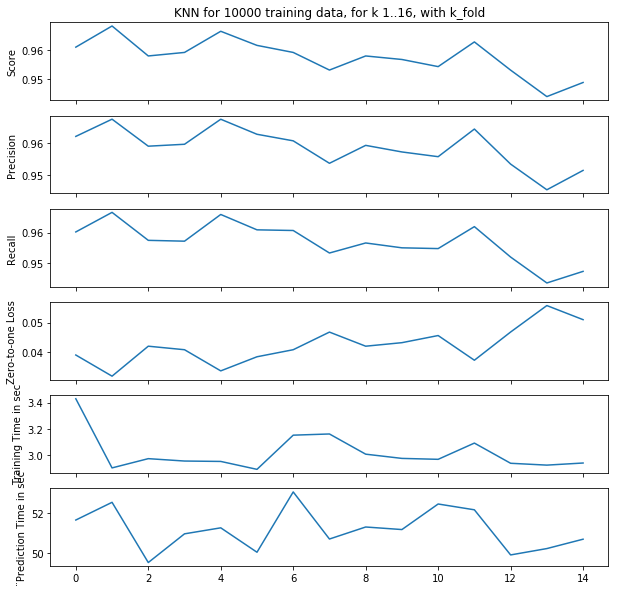

In [22]:
fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))
axarr[0].plot(range(15), ResScore)
axarr[0].set_title('KNN for 10000 training data, for k 1..16, with k_fold')
axarr[0].set_ylabel('Score')
axarr[1].plot(range(15), ResPrecision)
axarr[1].set_ylabel('Precision')
axarr[2].plot(range(15), ResRecall)
axarr[2].set_ylabel('Recall')
axarr[3].plot(range(15), ResLoss)
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].plot(range(15), ResTimeTraining)
axarr[4].set_ylabel('Training Time in sec')
axarr[5].plot(range(15), ResTimePrediction)
axarr[5].set_ylabel('¨Prediction Time in sec')

plt.show()
    

In [9]:
# VARIATION DE K sur les même xtrain, ytrain
#AUTRE METHODE + Simple
ResScore1 =[]
ResPrecision1 = []
ResRecall1 = []
ResLoss1 = []
ResTimeTraining1 = []
ResTimePrediction1 = []

for k in range(2,16):
    clf=neighbors.KNeighborsClassifier(k)
    startTrain =time.time()
    clf.fit(xtrain,ytrain)    
    endTrain = time.time()
    startpred= time.time()
    clf.predict(xtest)
    endpred = time.time()
    # Metrics
    predict = clf.predict(xtest)
    score = clf.score(xtest,ytest)
    precision =  metrics.precision_score(ytest, predict,  average='macro')
    recall = metrics.recall_score(ytest, predict, average ='macro')
    loss01 = metrics.zero_one_loss(ytest, predict)
    timetrain = endTrain - startTrain
    timePred = endpred - startpred
    # Append
    ResScore1.append(score)
    ResPrecision1.append(precision)
    ResRecall1.append(recall)
    ResLoss1.append(loss01) 
    ResTimeTraining1.append(timetrain)
    ResTimePrediction1.append(timePred)
    
    print("Pour K = ", k, "score = ", clf.score(xtest,ytest)*100, "%")


Pour K =  2 score =  93.55 %
Pour K =  3 score =  94.8 %
Pour K =  4 score =  94.65 %
Pour K =  5 score =  94.69999999999999 %
Pour K =  6 score =  94.5 %
Pour K =  7 score =  94.6 %
Pour K =  8 score =  94.35 %
Pour K =  9 score =  94.15 %
Pour K =  10 score =  93.95 %
Pour K =  11 score =  93.45 %
Pour K =  12 score =  93.45 %
Pour K =  13 score =  93.25 %
Pour K =  14 score =  93.60000000000001 %
Pour K =  15 score =  93.30000000000001 %


In [6]:
# pour garder une trace des résultats et ne pas runner encore une fois
print(ResScore1)
print(ResPrecision1)
print(ResRecall1)
print(ResLoss1)
print(ResTimeTraining1)
print(ResTimePrediction1)


NameError: name 'ResScore1' is not defined

In [11]:

ResScore1 =[0,0,0.9355, 0.948, 0.9465, 0.947, 0.945, 0.946, 0.9435, 0.9415, 0.9395, 0.9345, 0.9345, 0.9325, 0.936, 0.933]
ResPrecision1 =[0,0,0.9369785302063333, 0.9483535681114812, 0.9478015367975028, 0.9489961318511376, 0.9469750099974512, 0.9483241266220664, 0.9460728105064706, 0.9444154195906626, 0.9425744619419076, 0.9382878727393227, 0.9380586024012876, 0.9364426498880967, 0.9399642422701652, 0.9373434782916643]
ResRecall1 =[0,0,0.9337392168963335, 0.9462140532025879, 0.9447111859424187, 0.9452028679097209, 0.9432977314438814, 0.9439175794742087, 0.9413394824894725, 0.9391021145684713, 0.9371033156000339, 0.9320944556893789, 0.9319362836060178, 0.9298380294932936, 0.9334614073042518, 0.9306541550461519]
ResLoss1 =[0,0,0.0645, 0.052000000000000046, 0.05349999999999999, 0.05300000000000005, 0.05500000000000005, 0.05400000000000005, 0.056499999999999995, 0.058499999999999996, 0.0605, 0.0655, 0.0655, 0.0675, 0.06399999999999995, 0.06699999999999995]
ResTimeTraining1 =[0,0,0.5166172981262207, 0.49174928665161133, 0.4747319221496582, 0.5445361137390137, 0.644275426864624, 0.471738338470459, 0.466717004776001, 0.4777672290802002, 0.5266242027282715, 0.5675153732299805, 0.4736945629119873, 0.46780824661254883, 0.4667532444000244, 0.4667472839355469]
ResTimePrediction1 =[0,0,22.78105330467224, 24.293938875198364, 24.77076554298401, 23.338560104370117, 24.666009426116943, 22.96256709098816, 22.818949460983276, 24.3131742477417, 24.106471061706543, 23.65169048309326, 22.80199384689331, 22.930628538131714, 22.86682367324829, 23.083208799362183]

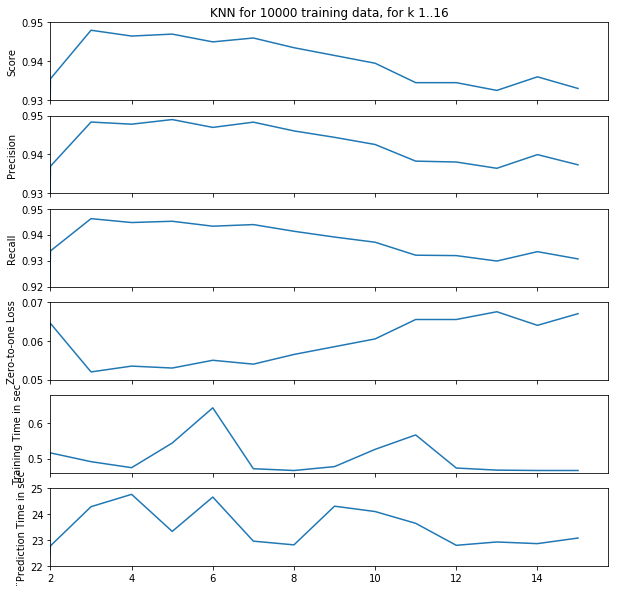

In [28]:
fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))
axarr[0].plot(range(16), ResScore1)
axarr[0].set_title('KNN for 10000 training data, for k 1..16')
axarr[0].set_ylabel('Score')
axarr[0].set_ylim([0.93,0.95])
axarr[1].plot(range(16), ResPrecision1)
axarr[1].set_ylabel('Precision')
axarr[1].set_ylim([0.93,0.95])
axarr[2].plot(range(16), ResRecall1)
axarr[2].set_ylabel('Recall')
axarr[2].set_ylim([0.92,0.95])
axarr[3].plot(range(16), ResLoss1)
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[3].set_ylim([0.05,0.07])
axarr[4].plot(range(16), ResTimeTraining1)
axarr[4].set_ylabel('Training Time in sec')
axarr[4].set_ylim([0.46,0.68])
axarr[5].plot(range(16), ResTimePrediction1)
axarr[5].set_ylabel('¨Prediction Time in sec')
axarr[5].set_ylim([22,25])
plt.xlim(left=2)

plt.show()

KFold(n_splits=15, random_state=None, shuffle=True)
Pour K = 3 score =  94.60269865067467 %
Pour K = 3 score =  94.15292353823088 %
Pour K = 3 score =  95.05247376311844 %
Pour K = 3 score =  94.75262368815592 %
Pour K = 3 score =  94.90254872563717 %
Pour K = 3 score =  94.45277361319341 %
Pour K = 3 score =  96.7016491754123 %
Pour K = 3 score =  95.05247376311844 %
Pour K = 3 score =  93.85307346326837 %
Pour K = 3 score =  94.90254872563717 %
Pour K = 3 score =  94.14414414414415 %
Pour K = 3 score =  95.1951951951952 %
Pour K = 3 score =  95.04504504504504 %
Pour K = 3 score =  93.84384384384384 %
Pour K = 3 score =  95.34534534534535 %
[0.9460269865067467, 0.9415292353823088, 0.9505247376311844, 0.9475262368815592, 0.9490254872563718, 0.9445277361319341, 0.967016491754123, 0.9505247376311844, 0.9385307346326837, 0.9490254872563718, 0.9414414414414415, 0.9519519519519519, 0.9504504504504504, 0.9384384384384384, 0.9534534534534534]
[0.9469330054302454, 0.9440384293746213, 0.9508495

ValueError: x and y must have same first dimension, but have shapes (14,) and (15,)

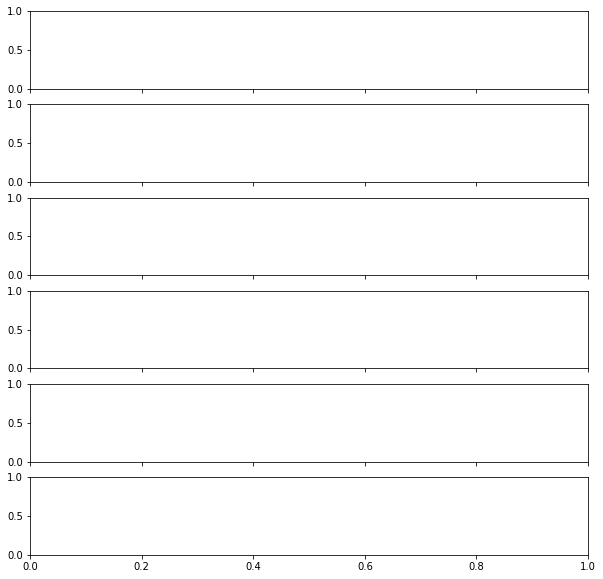

In [5]:
#VARIATION des data prises avec Kfold cross validation
#Ici, l'utilisation de K-fold CV est OK
ResScore4 =[]
ResPrecision4 = []
ResRecall4 = []
ResLoss4 = []
ResTimeTraining4 = []
ResTimePrediction4 = []

from sklearn.model_selection import KFold
k_fold = KFold( n_splits=15, shuffle=True)
print(k_fold)
clf=neighbors.KNeighborsClassifier(3)
for train_indices,test_indices in k_fold.split(data,target):
    # Algo
    startTrain =time.time()
    clf.fit(data[train_indices],target[train_indices])
    endTrain = time.time()
    startpred= time.time()
    clf.predict(data[test_indices])
    endpred = time.time()
    # Metrics
    predict = clf.predict(data[test_indices])
    score = clf.score(data[test_indices],target[test_indices])
    precision =  metrics.precision_score(target[test_indices], predict,  average='macro')
    recall = metrics.recall_score(target[test_indices], predict, average ='macro')
    loss01 = metrics.zero_one_loss(target[test_indices], predict)
    timetrain = endTrain - startTrain
    timePred = endpred - startpred
    # Append
    ResScore4.append(score)
    ResPrecision4.append(precision)
    ResRecall4.append(recall)
    ResLoss4.append(loss01) 
    ResTimeTraining4.append(timetrain)
    ResTimePrediction4.append(timePred)
    print("Pour K = 3 score = ", clf.score(data[test_indices],target[test_indices])*100, "%")
    


# pour garder une trace des résultats et ne pas runner encore une fois
print(ResScore4)
print(ResPrecision4)
print(ResRecall4)
print(ResLoss4)
print(ResTimeTraining4)
print(ResTimePrediction4)


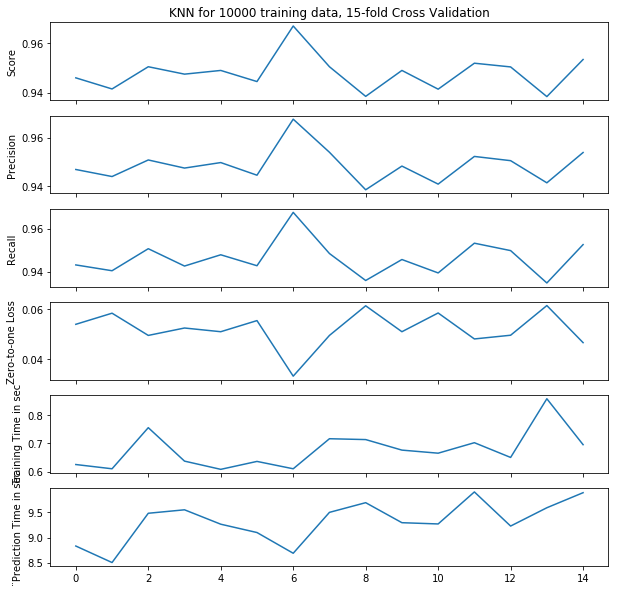

In [29]:

fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))
axarr[0].plot(range(15), ResScore4)
axarr[0].set_title('KNN for 10000 training data, 15-fold Cross Validation')
axarr[0].set_ylabel('Score')
axarr[1].plot(range(15), ResPrecision4)
axarr[1].set_ylabel('Precision')
axarr[2].plot(range(15), ResRecall4)
axarr[2].set_ylabel('Recall')
axarr[3].plot(range(15), ResLoss4)
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].plot(range(15), ResTimeTraining4)
axarr[4].set_ylabel('Training Time in sec')
axarr[5].plot(range(15), ResTimePrediction4)
axarr[5].set_ylabel('¨Prediction Time in sec')

plt.show()

In [23]:
# VARIATION de la taille des échantillons
ResScore2 =[]
ResPrecision2 = []
ResRecall2 = []
ResLoss2 = []
ResTimeTraining2 = []
ResTimePrediction2 = []

    
for k in range(1,10):
    clf=neighbors.KNeighborsClassifier(3)
    x_train, x_test, y_train, y_test =train_test_split(data, target, train_size=k*0.1)
    startTrain =time.time()
    clf.fit(x_train,y_train)
    endTrain = time.time()
    startpred= time.time()
    clf.predict(x_test)
    endpred = time.time()
    # Metrics
    predict = clf.predict(xtest)
    score = clf.score(xtest,ytest)
    precision =  metrics.precision_score(ytest, predict,  average='macro')
    recall = metrics.recall_score(ytest, predict, average ='macro')
    loss01 = metrics.zero_one_loss(ytest, predict)
    timetrain = endTrain - startTrain
    timePred = endpred - startpred
    # Append
    ResScore2.append(score)
    ResPrecision2.append(precision)
    ResRecall2.append(recall)
    ResLoss2.append(loss01) 
    ResTimeTraining2.append(timetrain)
    ResTimePrediction2.append(timePred)
    print("Pour un train/test = ", (k*10), "%, score = ", clf.score(x_test,y_test)*100, "%")
    
#Pour un train/test =  10 %, score =  81.44444444444444 %
#Pour un train/test =  20 %, score =  86.575 %
#Pour un train/test =  30 %, score =  88.31428571428572 %
#Pour un train/test =  40 %, score =  90.0 %
#Pour un train/test =  50 %, score =  91.12 %
#Pour un train/test =  60 %, score =  91.05 %
#Pour un train/test =  70 %, score =  89.8 %
#Pour un train/test =  80 %, score =  91.2 %
#Pour un train/test =  90 %, score =  93.2 %

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Pour un train/test =  10 %, score =  91.17333333333333 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Pour un train/test =  20 %, score =  93.175 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Pour un train/test =  30 %, score =  94.32571428571428 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Pour un train/test =  40 %, score =  95.17999999999999 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Pour un train/test =  50 %, score =  95.336 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Pour un train/test =  60 %, score =  95.56 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Pour un train/test =  70 %, score =  96.42666666666668 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Pour un train/test =  80 %, score =  96.54 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Pour un train/test =  90 %, score =  96.32 %


In [24]:
# pour garder une trace des résultats et ne pas runner encore une fois
print(ResScore2)
print(ResPrecision2)
print(ResRecall2)
print(ResLoss2)
print(ResTimeTraining2)
print(ResTimePrediction2)

#[0.8565, 0.8985, 0.91, 0.924, 0.935, 0.939, 0.941, 0.949, 0.953]
#[0.8754876643697613, 0.9069422336372133, 0.9176068152884023, 0.9284919254438952, 0.9394480071797873, 0.9423894170086836, 0.9439021118047204, 0.9517828219476396, 0.9555170850182355]
#[0.8507976794260326, 0.8943515897570011, 0.9066121362228408, 0.9212807512696845, 0.9330902432251772, 0.9367593715094854, 0.9388584929913811, 0.9471135546123071, 0.9510547635157918]
#[0.14349999999999996, 0.10150000000000003, 0.08999999999999997, 0.07599999999999996, 0.06499999999999995, 0.061000000000000054, 0.05900000000000005, 0.051000000000000045, 0.04700000000000004]
#[0.02293848991394043, 0.06283235549926758, 0.10571765899658203, 0.17253923416137695, 0.22740769386291504, 0.34108662605285645, 0.35405564308166504, 0.49268198013305664, 1.2057743072509766]
#[12.847708702087402, 22.783091068267822, 26.58786702156067, 34.319183588027954, 34.77798247337341, 33.279053926467896, 25.433951377868652, 23.24182105064392, 17.09430456161499]

[0.9115, 0.9365, 0.9465, 0.9475, 0.952, 0.9545, 0.9635, 0.963, 0.965]
[0.9146543111867235, 0.9373525828062419, 0.9476084304094877, 0.9477224405662025, 0.9532342163037308, 0.9550687835372578, 0.9639847850110626, 0.9636918708631453, 0.965799064457323]
[0.9087669787904268, 0.9344188504897719, 0.9445961400200271, 0.9457168525561535, 0.9508084480656489, 0.953283143801736, 0.9625808670675836, 0.962054436527883, 0.9642495996396265]
[0.08850000000000002, 0.0635, 0.05349999999999999, 0.05249999999999999, 0.04800000000000004, 0.045499999999999985, 0.03649999999999998, 0.03700000000000003, 0.03500000000000003]
[0.0967402458190918, 0.22838377952575684, 0.4378819465637207, 0.6662497520446777, 0.9534504413604736, 1.388293743133545, 1.8580303192138672, 2.213080644607544, 2.738673210144043]
[78.38728380203247, 132.48960399627686, 159.18809819221497, 205.2888307571411, 203.59344244003296, 182.911634683609, 190.98116636276245, 137.55199551582336, 72.26373219490051]


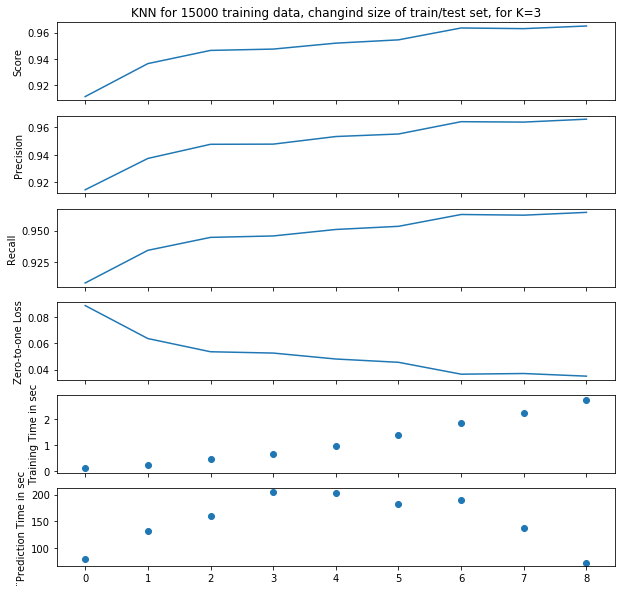

In [30]:
fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))
axarr[0].plot(range(9), ResScore2)
axarr[0].set_title('KNN for 15000 training data, changind size of train/test set, for K=3')
axarr[0].set_ylabel('Score')
axarr[1].plot(range(9), ResPrecision2)
axarr[1].set_ylabel('Precision')
axarr[2].plot(range(9), ResRecall2)
axarr[2].set_ylabel('Recall')
axarr[3].plot(range(9), ResLoss2)
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].scatter(range(9), ResTimeTraining2)
axarr[4].set_ylabel('Training Time in sec')
axarr[5].scatter(range(9), ResTimePrediction2)
axarr[5].set_ylabel('¨Prediction Time in sec')

plt.show()

In [25]:
#VARIATION de la taille des échantillons
ResScore3 =[]
ResPrecision3 = []
ResRecall3 = []
ResLoss3 = []
ResTimeTraining3 = []
ResTimePrediction3 = []

for k in range(1,6):
    indices = np.random.randint(70000, size=5000*k)
    data = mnist.data[indices]
    target = mnist.target[indices]
    #pour séparer le dataset en 2 échantillons de trainint et de test
    x_train, x_test, y_train, y_test =train_test_split(data, target, train_size=0.8)
    clf=neighbors.KNeighborsClassifier(3)
    startTrain =time.time()
    clf.fit(x_train,y_train)
    endTrain = time.time()
    startpred= time.time()
    clf.predict(x_test)
    endpred = time.time()
    # Metrics
    predict = clf.predict(xtest)
    score = clf.score(xtest,ytest)
    precision =  metrics.precision_score(ytest, predict,  average='macro')
    recall = metrics.recall_score(ytest, predict, average ='macro')
    loss01 = metrics.zero_one_loss(ytest, predict)
    timetrain = endTrain - startTrain
    timePred = endpred - startpred
    # Append
    ResScore3.append(score)
    ResPrecision3.append(precision)
    ResRecall3.append(recall)
    ResLoss3.append(loss01) 
    ResTimeTraining3.append(timetrain)
    ResTimePrediction3.append(timePred)
    print("Pour un échantillon de taille = ", (k*5000), ",score = ", clf.score(x_test,y_test)*100, "%")

#Pour un échantillon de taille =  5000 ,score =  92.5 %
#Pour un échantillon de taille =  10000 ,score =  93.60000000000001 %
#Pour un échantillon de taille =  15000 ,score =  94.63333333333334 %
#Pour un échantillon de taille =  20000 ,score =  94.69999999999999 %
#Pour un échantillon de taille =  25000 ,score =  95.54 %

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Pour un échantillon de taille =  5000 ,score =  93.7 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Pour un échantillon de taille =  10000 ,score =  94.8 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Pour un échantillon de taille =  15000 ,score =  95.56666666666666 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Pour un échantillon de taille =  20000 ,score =  95.89999999999999 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Pour un échantillon de taille =  25000 ,score =  96.06 %


In [26]:
# pour garder une trace des résultats et ne pas runner encore une fois
print(ResScore3)
print(ResPrecision3)
print(ResRecall3)
print(ResLoss3)
print(ResTimeTraining3)
print(ResTimePrediction3)
#[0.9185, 0.9375, 0.947, 0.9545, 0.9565]
#[0.9239451509342509, 0.940184968052854, 0.94913040865386, 0.956196591830037, 0.958119534251154]
#[0.9156434687814252, 0.9357598432718817, 0.9457375638031905, 0.9533719296011937, 0.9554811335570295]
#[0.08150000000000002, 0.0625, 0.05300000000000005, 0.045499999999999985, 0.04349999999999998]
#[0.1795210838317871, 0.6402866840362549, 0.894573450088501, 1.822124719619751, 2.120363473892212]
#[6.629263162612915, 24.836551904678345, 47.89191031455994, 92.35796546936035, 133.33727931976318]

[0.928, 0.9485, 0.95, 0.957, 0.9645]
[0.9302162316700665, 0.9496228135973531, 0.9503268055044056, 0.9575186250180774, 0.9656335068458608]
[0.9258288294477188, 0.9469389328296114, 0.9486957372897447, 0.9557224851340275, 0.9633819841760232]
[0.07199999999999995, 0.05149999999999999, 0.050000000000000044, 0.04300000000000004, 0.035499999999999976]
[0.1825118064880371, 0.5165843963623047, 0.8786494731903076, 1.4531123638153076, 2.139275074005127]
[5.753607273101807, 23.933969497680664, 45.763611793518066, 91.41243624687195, 132.96832299232483]


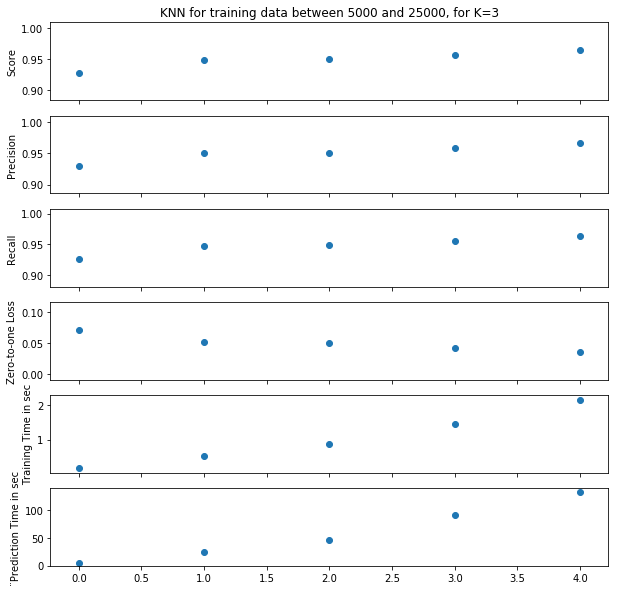

In [31]:
fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))
axarr[0].scatter(range(5), ResScore3)
axarr[0].set_title('KNN for training data between 5000 and 25000, for K=3')
axarr[0].set_ylabel('Score')
axarr[1].scatter(range(5), ResPrecision3)
axarr[1].set_ylabel('Precision')
axarr[2].scatter(range(5), ResRecall3)
axarr[2].set_ylabel('Recall')
axarr[3].scatter(range(5), ResLoss3)
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].scatter(range(5), ResTimeTraining3)
axarr[4].set_ylabel('Training Time in sec')
axarr[5].scatter(range(5), ResTimePrediction3)
axarr[5].set_ylabel('¨Prediction Time in sec')

plt.show()

In [27]:
# VARIATION de la distance
# Par défaut, la distance est la distance euclidienne (minkowskiDistance avec p = 2)
# see here for more details : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html 

print("Avec la distance Eucliedienne, le score = ", clf.score(xtest,ytest)*100, "%")

# test ManhattanDistance "manhattan"
manha=neighbors.KNeighborsClassifier(3, metric='manhattan')
manha.fit(xtrain,ytrain)
manha.predict(xtest)
print("Avec la distance de Manhattan, le score = ", manha.score(xtest,ytest)*100, "%")

#test ChebyshevDistance "chebyshev"
cheby=neighbors.KNeighborsClassifier(3, metric='chebyshev')
cheby.fit(xtrain,ytrain)
cheby.predict(xtest)
print("Avec la distance de Chebyshev, le score = ", cheby.score(xtest,ytest)*100, "%")

#test Hamming distance
ham=neighbors.KNeighborsClassifier(3, metric='hamming')
ham.fit(xtrain,ytrain)
ham.predict(xtest)
print("Avec la distance de Hamming, le score = ", ham.score(xtest,ytest)*100, "%")

#test minkowski p=3,4,5
mink3=neighbors.KNeighborsClassifier(3, p=3, metric='minkowski')
mink3.fit(xtrain,ytrain)
mink3.predict(xtest)
print("Avec la distance de Minkowski p=3 , le score = ", mink3.score(xtest,ytest)*100, "%")

mink4=neighbors.KNeighborsClassifier(3, p=4, metric='minkowski')
mink4.fit(xtrain,ytrain)
mink4.predict(xtest)
print("Avec la distance de Minkowski p=4, le score = ", mink4.score(xtest,ytest)*100, "%")

mink5=neighbors.KNeighborsClassifier(3, p=5, metric='minkowski')
mink5.fit(xtrain,ytrain)
mink5.predict(xtest)
print("Avec la distance de Minkowski p=5, le score = ", mink5.score(xtest,ytest)*100, "%")


Avec la distance Eucliedienne, le score =  96.45 %
Avec la distance de Manhattan, le score =  93.65 %
Avec la distance de Chebyshev, le score =  68.45 %
Avec la distance de Hamming, le score =  74.0 %
Avec la distance de Minkowski p=3 , le score =  95.3 %
Avec la distance de Minkowski p=4, le score =  95.3 %
Avec la distance de Minkowski p=5, le score =  95.3 %


Avec la distance de Minkowski p=4, le score =  95.5 %
Avec la distance de Minkowski p=5, le score =  95.85000000000001 %


In [28]:
# MESURE avec njobs
import time
job1=neighbors.KNeighborsClassifier(3, n_jobs=1)
job=neighbors.KNeighborsClassifier(3, n_jobs=-1)


In [29]:
# MESURE avec njobs
# TODO :A FAIRE TOURNER !!!!!
#import timeit
#job1=neighbors.KNeighborsClassifier(10, n_jobs=1)
#job=neighbors.KNeighborsClassifier(10, n_jobs=-1)
# for help https://docs.python.org/2/library/timeit.html 

def trainjob1():
    starttime= time.time()
    job1.fit(xtrain,ytrain)
    endtime = time.time()
    print("temps entrainement 1 job : ",  endtime - starttime , "sec.")
    
def predjob1():
    starttime= time.time()
    job1.predict(xtest)
    endtime = time.time()
    job1.score(xtest,ytest)
    print("temps prediction 1 job : ",  endtime - starttime , "sec.")

def trainjob():
    starttime= time.time()
    job.fit(xtrain,ytrain)
    endtime = time.time()
    print("temps entrainement -1 job : ",  endtime - starttime , "sec.")
    

def predjob():
    starttime= time.time()
    job.predict(xtest)
    endtime = time.time()
    job.score(xtest,ytest)
    print("temps prediction -1 job : ",  endtime - starttime , "sec.")

trainjob1()
predjob1()
trainjob()
predjob()


temps entrainement 1 job :  0.49367713928222656 sec.
temps prediction 1 job :  25.477837085723877 sec.
temps entrainement -1 job :  0.5066468715667725 sec.
temps prediction -1 job :  7.67464017868042 sec.


In [ ]:
# quels sont les avantages de KNN ??
# -optimalité ?
# - temps de calcul ?
# - passage à l'échelle ?



In [2]:
#Meilleur KNN
# K=3
# Toutes les ressources (njobs=-1)
# distance euclidienne par défaut

#ECHANTILLONS DE 10000
indices = np.random.randint(70000, size=20000)
data = mnist.data[indices]
target = mnist.target[indices]
#pour séparer le dataset en 2 échantillons de trainint et de test
xtrain, xtest, ytrain, ytest =train_test_split(data, target, train_size=0.8)


#Classifier
clf=neighbors.KNeighborsClassifier(3,n_jobs=-1)
# temps de training et prédiction mesuré
startTrain =time.time()
clf.fit(xtrain,ytrain)    
endTrain = time.time()
startpred= time.time()
clf.predict(xtest)
endpred = time.time()
 # Metrics (score, precision, recall, zero-to-one loss, temps de training et de predicion)
predict = clf.predict(xtest)
score = clf.score(xtest,ytest)
precision =  metrics.precision_score(ytest, predict,  average='macro')
recall = metrics.recall_score(ytest, predict, average ='macro')
loss01 = metrics.zero_one_loss(ytest, predict)
timetrain = endTrain - startTrain
timePred = endpred - startpred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
print("Ce modèle de KNN, K=3, à un score de ", score*100, "%.")
print("4eme image : prédiction ",predict[3], "reel : ", ytest[3])
print ("ce KNN à une précision de", precision*100, "%.")
print ("ce KNN à un recall de",recall*100, "%.")
print ("ce KNN à un zero-one_loss de",recall*100, "%.")
print("    temps apprentissage : ", timetrain, "sec , temps prediction = ", timePred, "sec." )


Ce modèle de KNN, K=3, à un score de  95.75 %.
4eme image : prédiction  2.0 reel :  2.0
ce KNN à une précision de 95.8171550275235 %.
ce KNN à un recall de 95.69581521050152 %.
ce KNN à un zero-one_loss de 95.69581521050152 %.
    temps apprentissage :  1.5378844738006592 sec , temps prediction =  29.139420747756958 sec.
